# Sentiment Analysis

Tool : project [vaderSentiment](https://github.com/cjhutto/vaderSentiment)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from matplotlib import pyplot as plt
import pandas as pd
data = "https://raw.githubusercontent.com/ArtaXerxess/Social-Media-Analytics-Lab/main/SMA%20Lab%207/20191226-reviews.csv"

In [ ]:
df = pd.read_csv(data)
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
print(df.shape)
print(df.dtypes)

(67986, 8)
asin             object
name             object
rating            int64
date             object
verified           bool
title            object
body             object
helpfulVotes    float64
dtype: object


In [ ]:
df.drop(['asin','name','rating','date',"title",'verified','helpfulVotes'],axis=1,inplace = True)
df.head()

,body
0,I had the Samsung A600 for awhile which is abs...
1,Due to a software issue between Nokia and Spri...
2,"This is a great, reliable phone. I also purcha..."
3,"I love the phone and all, because I really did..."
4,The phone has been great for every purpose it ...


In [ ]:
df['scores']=df['body'].apply(lambda body: sia.polarity_scores(str(body)))
df.head()

In [ ]:
df['Positive'] = df['scores'].apply(lambda scores: dict(scores)['pos'])
df['Negative'] = df['scores'].apply(lambda scores: dict(scores)['neg'])
df['Neutral'] = df['scores'].apply(lambda scores: dict(scores)['neu'])
df['Compound'] = df['scores'].apply(lambda scores: dict(scores)['compound'])

In [ ]:
df.head()

,body,scores,Positive,Negative,Neutral,Compound
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp...",0.100,0.076,0.825,0.8629
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou...",0.100,0.030,0.870,0.8720
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co...",0.121,0.048,0.831,0.8966
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.143,0.000,0.857,0.9592
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co...",0.117,0.067,0.816,0.7432


In [ ]:
mobileBrands = ['samsung','nokia','apple','google pixel','redmi','xiaomi']
def brandname(mobileBrands ,review):
  for brand in mobileBrands:
    if brand in review:
      return brand

In [ ]:
df["Brand_Names"] = df["body"].apply(lambda body : brandname(mobileBrands ,str(body).lower()))

In [ ]:
df.head()

,body,scores,Positive,Negative,Neutral,Compound,Brand_Names
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp...",0.100,0.076,0.825,0.8629,samsung
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou...",0.100,0.030,0.870,0.8720,nokia
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co...",0.121,0.048,0.831,0.8966,samsung
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.143,0.000,0.857,0.9592,None
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co...",0.117,0.067,0.816,0.7432,None


In [ ]:
rows , cols = df.shape

def countscores(brandname):
  pos_sum = 0
  neg_sum = 0
  neut_sum = 0
  comp_sum = 0
  count = 0
  for i in range(0,rows):
    if df.loc[i]['Brand_Names'] == brandname:
      count = count + 1
      pos_sum = pos_sum + float(df.loc[i]['Positive'])
      neg_sum = neg_sum + float(df.loc[i]['Negative'])
      neut_sum = neut_sum + float(df.loc[i]['Neutral'])
      comp_sum = comp_sum + float(df.loc[i]['Compound'])
  aveg_pos = pos_sum / count
  aveg_neg = neg_sum / count
  aveg_neut = neut_sum / count
  aveg_comp = comp_sum / count
  # print([aveg_pos,aveg_neg,aveg_neut,aveg_comp])
  return [aveg_pos,aveg_neg,aveg_neut,aveg_comp]

In [ ]:
mobileBrands = ['samsung','nokia','apple','google pixel','redmi','xiaomi']
def plotter():
  for brand in mobileBrands:
    y = countscores(brand)[:-1]
    x = ['Positive',"negative",'neutral']
    plt.bar(x,y)
    plt.show()
    print(brand," ",y,"\n\n")

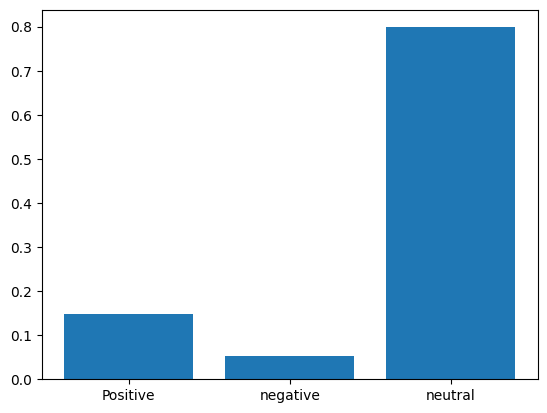

samsung   [0.14834341334341383, 0.05318900018900015, 0.7984672084672113] 




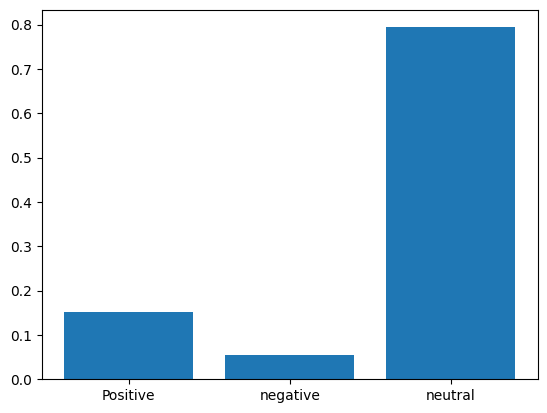

nokia   [0.15105563689604695, 0.05484333821376288, 0.7940893118594428] 




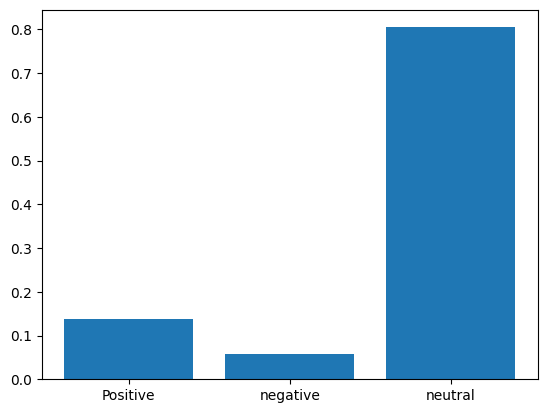

apple   [0.13850481927710837, 0.05677228915662647, 0.8047385542168668] 




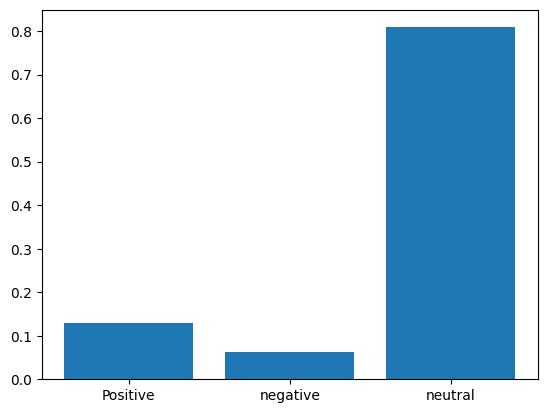

google pixel   [0.12951851851851848, 0.061635802469135824, 0.8087777777777774] 




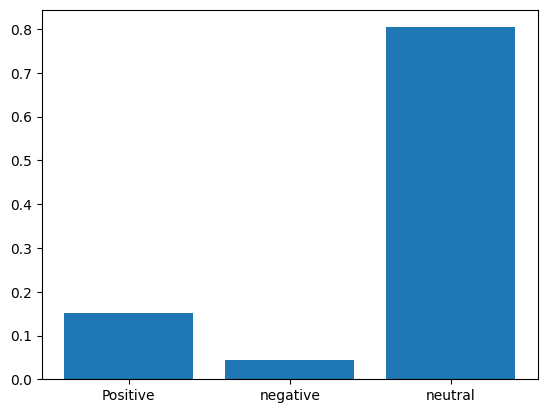

redmi   [0.15195454545454548, 0.043992424242424256, 0.8040909090909091] 




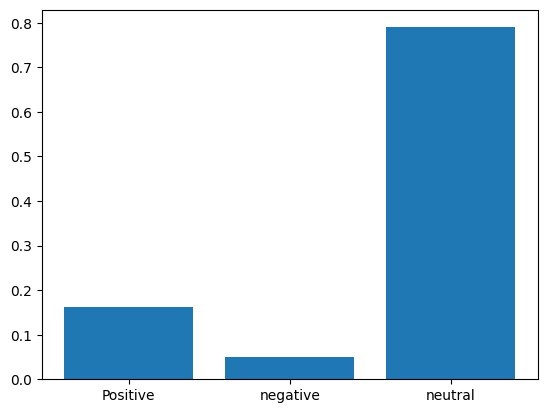

xiaomi   [0.16126765799256504, 0.049011152416356896, 0.7896988847583639] 




In [ ]:
plotter()

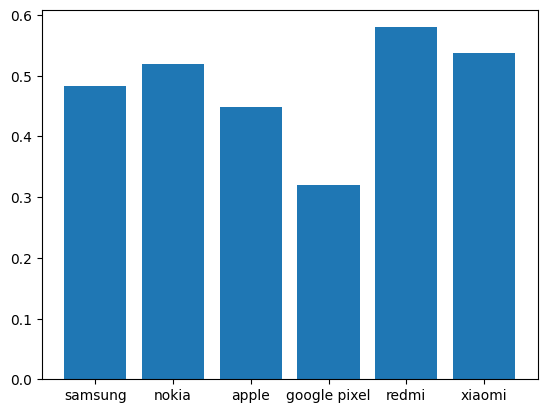

In [ ]:
mobileBrands = ['samsung','nokia','apple','google pixel','redmi','xiaomi']
compound_scores = [countscores(i)[-1] for i in mobileBrands]
plt.bar(mobileBrands,compound_scores)
plt.show()